In [ ]:
import os
os.chdir('Covid 19 Project')

In [2]:
# Importing the Libraries
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet,VGG16,DenseNet121,ResNet152,InceptionResNetV2,InceptionV3,VGG19,ResNet50
from keras.applications.mobilenet import preprocess_input
# from keras.applications.resnet50 import preprocess_input

from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc
# from mlxtend.evaluate import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

#import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
import tensorflow as tf

ModuleNotFoundError: No module named 'catboost'

In [4]:
conda uninstall -c anaconda py-xgboost


Note: you may need to restart the kernel to use updated packages.


The system cannot execute the specified program.


In [55]:
!pip install catboost

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\gputest\lib\site-packages\pip\_vendor\urllib3\response.py", line 425, in _error_catcher
    yield
  File "C:\Users\user\.conda\envs\gputest\lib\site-packages\pip\_vendor\urllib3\response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\user\.conda\envs\gputest\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\user\.conda\envs\gputest\lib\http\client.py", line 457, in read
    n = self.readinto(b)
  File "C:\Users\user\.conda\envs\gputest\lib\http\client.py", line 501, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\user\.conda\envs\gputest\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\user\.conda\envs\gputest\lib\ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\user\.conda\envs\gputest\lib\s

In [6]:
# Loading Training Images
normal_images=os.listdir(os.path.join('Training Dataset','normal'))
covid_images=os.listdir(os.path.join('Training Dataset','covid'))

In [7]:
# Empty DataFrame
normal_image_df=pd.DataFrame()
covid_image_df=pd.DataFrame()

In [8]:
normal_image_df['ID']=normal_images
normal_image_df['label']='normal'

In [9]:
covid_image_df['ID']=covid_images
covid_image_df['label']='covid'

In [10]:
covid_image_df

,ID,label
0,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,covid
1,03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg,covid
2,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,covid
3,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,covid
4,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,covid
...,...,...
339,wong-0005.jpg,covid
340,X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg,covid
341,yxppt-2020-02-19_00-51-27_287214-day10.jpg,covid
342,yxppt-2020-02-19_00-51-27_287214-day12.jpg,covid


In [11]:
train_df=pd.concat([normal_image_df,covid_image_df],ignore_index=True)

In [12]:
train_df.head(10)

,ID,label
0,IM-0117-0001.jpeg,normal
1,IM-0119-0001.jpeg,normal
2,IM-0128-0001.jpeg,normal
3,IM-0149-0001.jpeg,normal
4,IM-0152-0001.jpeg,normal
5,IM-0158-0001.jpeg,normal
6,IM-0160-0001.jpeg,normal
7,IM-0185-0001.jpeg,normal
8,IM-0187-0001.jpeg,normal
9,IM-0193-0001.jpeg,normal


In [13]:
len(train_df)

648

In [14]:
# Loading Train Images
train_images = []
train_labels=[]
for img_name,label in zip(train_df.ID,train_df.label):
  if label=='normal':
      img = cv2.imread(os.path.join('Training Dataset/normal',img_name))
      img=cv2.resize(img,(224,224))
      if img is not None:
          train_images.append(img)
          train_labels.append('normal')
  else:
      img=cv2.imread(os.path.join('Training Dataset/covid',img_name))
      img=cv2.resize(img,(224,224))
      if img is not None:
        train_images.append(img)
        train_labels.append('covid')


In [15]:
len(train_images)

648

In [16]:
# Loading Testing Images
test_normal_images=os.listdir(os.path.join('Testing Dataset/normal'))
test_covid_images=os.listdir(os.path.join('Testing Dataset/covid'))

In [17]:
len(test_covid_images)

549

In [18]:
# Empty DataFrame
test_normal_image_df=pd.DataFrame()
test_covid_image_df=pd.DataFrame()

In [19]:
test_normal_image_df['ID']=test_normal_images
test_normal_image_df['label']='normal'

In [20]:
test_covid_image_df['ID']=test_covid_images
test_covid_image_df['label']='covid'

In [21]:
test_df=pd.concat([test_normal_image_df,test_covid_image_df],ignore_index=True)

In [22]:
len(test_df)

783

In [23]:
len(list(set(test_normal_images)))

234

In [24]:
# Loading Testing Images
test_images = []
test_labels=[]
for img_name,label in zip(test_df.ID,test_df.label):
  if label=='normal':
        img = cv2.imread(os.path.join('Testing Dataset/normal',img_name))
        img=cv2.resize(img,(224,224))
        if img is not None:
            test_images.append(img)
            test_labels.append('normal')
  else:
      img=cv2.imread(os.path.join('Testing Dataset/covid',img_name))
      img=cv2.resize(img,(224,224))
      if img is not None:
        test_images.append(img)
        test_labels.append('covid')


In [25]:
train_images=np.array(train_images)
test_images=np.array(test_images)

In [26]:
# # Normalizing Train and Test Images
# train_images=train_images/255.
# test_images=test_images/255.

In [27]:
len(test_images)

783

In [29]:
# Feature Extraction for train
model = MobileNet(weights='imagenet', include_top=False)
# model = VGG16(weights='imagenet', include_top=False)
# model = DenseNet121(weights='imagenet', include_top=False)
# model = ResNet152(weights='imagenet', include_top=False)
# model = InceptionResNetV2(weights='imagenet', include_top=False)
# model = InceptionV3(weights='imagenet', include_top=False)
# model = VGG19(weights='imagenet', include_top=False)

model_feature_list = []

for img in train_images:  
    img_data = np.expand_dims(img, axis=0)
    img_data = preprocess_input(img_data)

    model_feature = model.predict(img_data)
    model_feature_np = np.array(model_feature)
    model_feature_list.append(model_feature_np.flatten())

train_x = np.array(model_feature_list)

17227776/17225924 [==============================] - 116s 7us/step


In [30]:
# Feature Extraction for test
model = MobileNet(weights='imagenet', include_top=False)
# model = VGG16(weights='imagenet', include_top=False)
# model = DenseNet121(weights='imagenet', include_top=False)
# model = ResNet152(weights='imagenet', include_top=False)
# model = InceptionResNetV2(weights='imagenet', include_top=False)
# model = InceptionV3(weights='imagenet', include_top=False)
# model = VGG19(weights='imagenet', include_top=False)
model_feature_list = []

for img in test_images:  
    img_data = np.expand_dims(img, axis=0)
    img_data = preprocess_input(img_data)

    model_feature = model.predict(img_data)
    model_feature_np = np.array(model_feature)
    model_feature_list.append(model_feature_np.flatten())

test_x = np.array(model_feature_list)

In [31]:
# Label Encoding
train_y=pd.Series(train_labels)
label_encode={'normal':0,'covid':1}
train_y=train_y.replace(label_encode)
test_y=pd.Series(test_labels)
test_y=test_y.replace(label_encode)
train_y=train_y.astype('category')
test_y=test_y.astype('category')

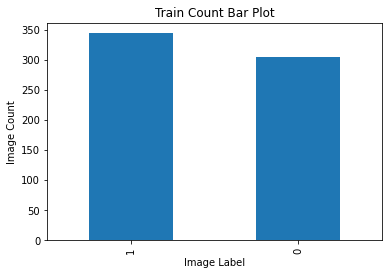

In [32]:
# Count Bar Plot Train
train_y.value_counts().plot(kind='bar')
plt.plot()
plt.title('Train Count Bar Plot')
plt.xlabel('Image Label')
plt.ylabel('Image Count')
plt.show()


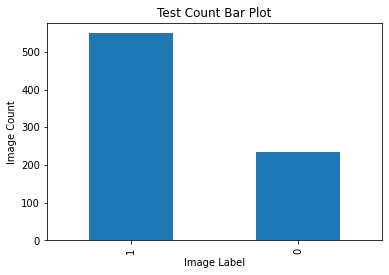

In [33]:
# Count Bar Plot on Test Data
test_y.value_counts().plot(kind='bar')
plt.plot()
plt.title('Test Count Bar Plot')
plt.xlabel('Image Label')
plt.ylabel('Image Count')
plt.show()

In [34]:
test_y.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [35]:
# Fitting the Classifier
# classifier=SVC(kernel='rbf',C=0.5)
# classifier.fit(train_x,train_y)


# classifier=RandomForestClassifier(n_estimators=400,max_depth=7)
# classifier.fit(train_x,train_y)

# model = CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='Accuracy',use_best_model=True,random_seed=42,gpu_ram_part=0.3,gpu_cat_features_storage='CpuPinnedMemory')
# model.fit(train_x,train_y,eval_set=(test_x,test_y))
# classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42,n_estimators=1000)
# classifier.fit(train_x,train_y)
# classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
# classifier= LGBMClassifier(boosting_type='gbdt',objective='binary',metric='accuracy')
classifier=KNeighborsClassifier(n_neighbors=120,p=2)
classifier.fit(train_x,train_y)


NameError: name 'KNeighborsClassifier' is not defined

In [36]:
# # n_neighbors selection
# neighbors = list(range(1,20))
# train_results = []
# test_results = []
# for n in neighbors:
#    model = KNeighborsClassifier(n_neighbors=n)
#    model.fit(train_x, train_y)
#    train_pred = model.predict(train_x)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = model.predict(test_x)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
# line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('n_neighbors')
# plt.show()

In [37]:
neighbors = list(range(1,200))

In [38]:
neighbors

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [39]:
# # Hyperparameter Tuning
# param_grid = {'n_neighbors':[80,90,120,200]}
# grid=GridSearchCV(estimator=KNeighborsClassifier(),cv=5,param_grid=param_grid)
# grid.fit(train_x,train_y)  

In [40]:
# print('Best Parameters',grid.best_params_)

In [41]:
# Predicting the Train Set Results
y_pred_train=classifier.predict(train_x)

NameError: name 'classifier' is not defined

In [42]:
# # Reshaping the Test Data
# test_x=np.reshape(test_images, (test_images.shape[0], -1))

In [43]:
# test_x.shape

In [44]:
# Predicting the Test Set Results
y_pred_test=classifier.predict(test_x)

NameError: name 'classifier' is not defined

In [45]:
#Checking the Accuracy

print("Training Accuracy is:",accuracy_score(train_y,y_pred_train))

print("Testing Accuracy is:",accuracy_score(test_y,y_pred_test))

NameError: name 'y_pred_train' is not defined

In [46]:
# Confusion Matrix for training data

cm=confusion_matrix(train_y, y_pred_train,labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Covid', 'Normal'])
ax.yaxis.set_ticklabels(['Covid','Normal'])

# cm=confusion_matrix(y_target=train_y,y_predicted=y_pred_train)
# fig,ax=plot_confusion_matrix(conf_mat=cm,cmap='Dark2',colorbar=True)
# labels=['normal','covid']
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)

# plt.title('Confusion Matrix')

# plt.show()


NameError: name 'y_pred_train' is not defined

In [47]:
# Confusion Matrix for testing data

cm=confusion_matrix(test_y, y_pred_test,labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Covid', 'Normal'])
ax.yaxis.set_ticklabels(['Covid','Normal'])
# cm=confusion_matrix(y_target=test_y,y_predicted=y_pred_test)
# fig,ax=plot_confusion_matrix(conf_mat=cm,cmap='Dark2',colorbar=True)
# labels=['normal','covid']
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)

# plt.title('Confusion Matrix')
# plt.show()

NameError: name 'y_pred_test' is not defined

In [48]:
y_pred_test=pd.Series(y_pred_test)
y_pred_test.value_counts()

NameError: name 'y_pred_test' is not defined

In [49]:
# Training Classification Report
print(classification_report(train_y,y_pred_train))

NameError: name 'y_pred_train' is not defined

In [50]:
# Testing Classification Report
print(classification_report(test_y,y_pred_test))

NameError: name 'y_pred_test' is not defined

In [51]:
# Checking the Cross Validation Score on Train Data
scores_train = cross_val_score(classifier,train_x, train_y, cv=10,scoring='accuracy')

NameError: name 'cross_val_score' is not defined

In [52]:
# Checking the Cross Validation Score on Test Data
scores_test=cross_val_score(classifier,test_x,test_y,cv=10,scoring='accuracy')

NameError: name 'cross_val_score' is not defined

In [53]:
print('Mean Cross Validation Train Score:{}'.format(np.mean(scores_train)))
print('Mean Cross Validation Test Score:{}'.format(np.mean(scores_test)))

NameError: name 'scores_train' is not defined